In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
unemployment = pd.read_csv("Activity, unemployment and employment rates by province and sex.csv", encoding="ANSI", delimiter=";")
foreclosure = pd.read_csv("Dwellings with begun foreclosure according to dwelling status by province.csv", encoding="ANSI", delimiter=";")
population = pd.read_csv("Population by autonomous community, province and size of municipality.csv", encoding="ANSI", delimiter=";")

In [51]:
unemployment = unemployment.pivot_table(
    index='Provincias',
    columns='Sexo',
    values='Total',
    aggfunc='first'
).reset_index()

unemployment.columns = ['Provinces', 'unemployment_both_sexes', 'unemployment_men', 'unemployment_women']

In [52]:
unemployment.info()
print(unemployment.head(3))

foreclosure.info()
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provinces                52 non-null     object
 1   unemployment_both_sexes  52 non-null     object
 2   unemployment_men         52 non-null     object
 3   unemployment_women       52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB
             Provinces unemployment_both_sexes unemployment_men  \
0       01 Araba/Бlava                    8,80             9,59   
1          02 Albacete                   13,23             9,86   
2  03 Alicante/Alacant                   14,37            10,95   

  unemployment_women  
0               7,79  
1              17,26  
2              18,38  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           ----------

In [53]:
# First, let's select only the province and total columns from each dataframe
unemployment_clean = unemployment[['Provinces', 'unemployment_both_sexes', 'unemployment_men', 'unemployment_women']].rename(columns={'Provinces': 'province',})
foreclosure_clean = foreclosure[['Provinces', 'Total']].rename(columns={'Provinces': 'province', 'Total': 'foreclosure'})
population_clean = population[['Provinces', 'Total']].rename(columns={'Provinces': 'province', 'Total': 'population'})

# Now merge the dataframes on province
merged_df = unemployment_clean.merge(foreclosure_clean, on='province', how='inner')
merged_df = merged_df.merge(population_clean, on='province', how='inner')


merged_df.foreclosure = merged_df.foreclosure.str.replace(',','').astype(int)
merged_df.population = merged_df.population.str.replace(',','').astype(int)
merged_df.unemployment_women = merged_df.unemployment_women.str.replace(',','.').astype(float)
merged_df.unemployment_men = merged_df.unemployment_men.str.replace(',','.').astype(float)
merged_df.unemployment_both_sexes = merged_df.unemployment_both_sexes.str.replace(',','.').astype(float)

merged_df.sort_values(by='province', inplace=True)
merged_df.reset_index(drop=True, inplace=True)

merged_df['foreclosure_rate_per_100k'] = (merged_df['foreclosure'] / merged_df['population']) * 100000

print(merged_df.info())
print(merged_df.head())

df = merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   province                   52 non-null     object 
 1   unemployment_both_sexes    52 non-null     float64
 2   unemployment_men           52 non-null     float64
 3   unemployment_women         52 non-null     float64
 4   foreclosure                52 non-null     int64  
 5   population                 52 non-null     int64  
 6   foreclosure_rate_per_100k  52 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.0+ KB
None
              province  unemployment_both_sexes  unemployment_men  \
0       01 Araba/Бlava                     8.80              9.59   
1          02 Albacete                    13.23              9.86   
2  03 Alicante/Alacant                    14.37             10.95   
3           04 Almerнa                    15.90    

In [66]:
df.tail(3)

,province,unemployment_both_sexes,unemployment_men,unemployment_women,foreclosure,population,foreclosure_rate_per_100k
49,50 Zaragoza,7.73,5.68,10.03,207,987763,20.956444
50,51 Ceuta,28.99,22.23,37.03,6,83179,7.213359
51,52 Melilla,32.44,30.21,35.12,10,85985,11.629935


In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   province                   52 non-null     object 
 1   unemployment_both_sexes    52 non-null     float64
 2   unemployment_men           52 non-null     float64
 3   unemployment_women         52 non-null     float64
 4   foreclosure                52 non-null     int64  
 5   population                 52 non-null     int64  
 6   foreclosure_rate_per_100k  52 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.0+ KB
None


Text(0.5, 0, 'Взыскания на 100 тыс. населения')

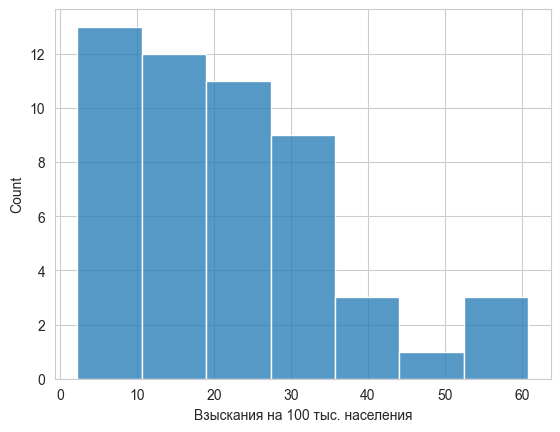

In [63]:
import seaborn as sns

sns.histplot(df['foreclosure_rate_per_100k'])
plt.xlabel('Взыскания на 100 тыс. населения')

Text(0.5, 0, '% безработицы')

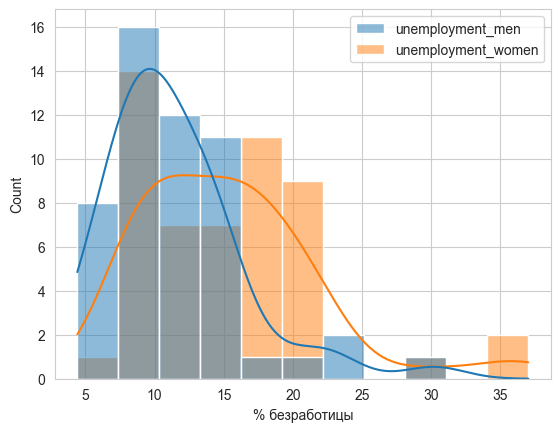

In [60]:
sns.histplot([df['unemployment_men'], df['unemployment_women']], multiple='layer', kde=True,)
plt.xlabel("% безработицы")

Text(0.5, 0, '% безработицы')

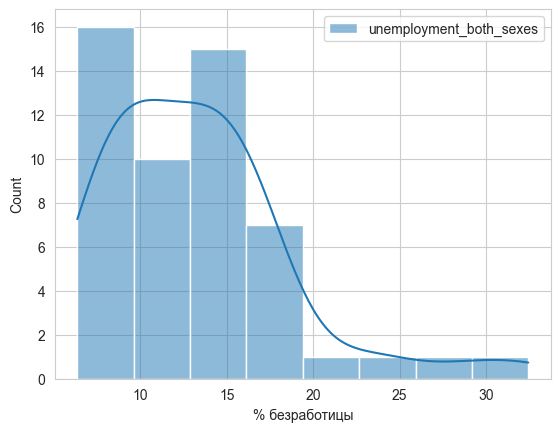

In [62]:
sns.histplot([df['unemployment_both_sexes'], ], multiple='layer', kde=True,)
plt.xlabel("% безработицы")


In [65]:
from scipy.stats import shapiro

# 0   province                   52 non-null     object
# 1   unemployment_both_sexes    52 non-null     float64
# 2   unemployment_men           52 non-null     float64
# 3   unemployment_women         52 non-null     float64
# 4   foreclosure                52 non-null     int64
# 5   population                 52 non-null     int64
# 6   foreclosure_rate_per_100k  52 non-null     float64


for i in ['unemployment_both_sexes', 'unemployment_men', 'unemployment_women', 'foreclosure_rate_per_100k']:
    stat, p = shapiro(df[i])
    print(f'{i}: {stat:.4f}, p_value: {p:.4f}')

unemployment_both_sexes: 0.8743, p_value: 0.0001
unemployment_men: 0.8870, p_value: 0.0001
unemployment_women: 0.8834, p_value: 0.0001
foreclosure_rate_per_100k: 0.9237, p_value: 0.0026


In [71]:
from scipy.stats import spearmanr
corr, p = spearmanr(df['unemployment_men'], df['unemployment_women'])
print(f'{corr:.4f} \t {p:.7f}')


0.7639 	 0.0000000


In [72]:
from scipy.stats import kendalltau
corr, p = kendalltau(df['unemployment_men'], df['unemployment_women'])
print(f'{corr:.4f} \t {p:.7f}')

0.5706 	 0.0000000


In [76]:
from scipy.stats import mannwhitneyu

median = df['unemployment_both_sexes'].median()

low = df[df['unemployment_both_sexes'] < median]['foreclosure_rate_per_100k'].values
high = df[df['unemployment_both_sexes'] >= median]['foreclosure_rate_per_100k'].values

print(len(df),len(low), len(high))

stat, p = mannwhitneyu(low, high, alternative='two-sided')
print(f'U: {stat}, p-value: {p:.4f}')

52 26 26
U: 198.0, p-value: 0.0107


In [79]:
from scipy.stats import mannwhitneyu

median = df['unemployment_women'].median()

low = df[df['unemployment_women'] < median]['unemployment_men'].values
high = df[df['unemployment_women'] >= median]['unemployment_men'].values

print(len(df),len(low), len(high))

from scipy.stats import median_test
stat, p, med, contingency = median_test(low, high)
print(f'chi: {stat:.4f}, p-value: {p:.4f}, med: {med}, contingency: {contingency}')

52 26 26
chi: 22.2308, p-value: 0.0000, med: 10.620000000000001, contingency: [[ 4 22]
 [22  4]]


In [88]:
groups = df.groupby(pd.qcut(df['population'], q=4, labels=False))

from scipy.stats import kruskal
stat, p = kruskal(groups.get_group(0)['foreclosure_rate_per_100k'].values, groups.get_group(1)['foreclosure_rate_per_100k'].values, groups.get_group(2)['foreclosure_rate_per_100k'].values, groups.get_group(3)['foreclosure_rate_per_100k'].values)
print(f'H: {stat:.4f}, p-value: {p:.4f}')

H: 11.4129, p-value: 0.0097
